In [1]:
%matplotlib inline

import os

import keras
import numpy as np
import matplotlib.pyplot as plt

from keras.layers import Dense, Conv2D, MaxPooling2D, Flatten, Input, Activation, add, Add, Dropout
from keras.callbacks import EarlyStopping
from keras.layers.normalization import BatchNormalization
from keras.models import Sequential, Model
from keras.datasets import cifar10
from keras.datasets import fashion_mnist
from keras.utils import to_categorical
from sklearn.model_selection import train_test_split

from IPython.display import SVG
from keras.utils.vis_utils import model_to_dot

random_state = 42

Using TensorFlow backend.


In [2]:
(x_train, y_train), (x_test, y_test) = fashion_mnist.load_data()

4423680/4422102 [==============================] - 4s 1us/step


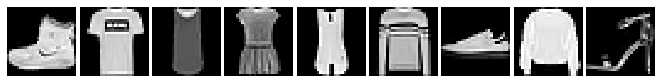

In [3]:
fig = plt.figure(figsize=(9, 15))
fig.subplots_adjust(left=0, right=1, bottom=0, top=0.5, hspace=0.05,
                    wspace=0.05)

for i in range(9):
    ax = fig.add_subplot(1, 9, i + 1, xticks=[], yticks=[])
    ax.imshow(x_train[i], cmap='gray')

In [4]:
x_train.shape

(60000, 28, 28)

In [0]:
x_train = x_train.reshape((x_train.shape[0], 28, 28, 1)) / 255
x_test = x_test.reshape((x_test.shape[0], 28, 28, 1)) / 255
y_train = to_categorical(y_train)
y_test = to_categorical(y_test)

In [6]:
x_train.shape

(60000, 28, 28, 1)

In [0]:
model = Sequential()

# 入力画像 28x28x1 (縦の画素数)x(横の画素数)x(チャンネル数)
model.add(Conv2D(16, kernel_size=(5, 5), activation='relu',
                 kernel_initializer='he_normal', input_shape=(28, 28, 1)))  # 28x28x1 -> 24x24x16
model.add(MaxPooling2D(pool_size=(2, 2)))  # 24x24x16 -> 12x12x16
model.add(Conv2D(64, kernel_size=(5, 5), activation='relu',
                 kernel_initializer='he_normal'))  # 12x12x16 -> 8x8x64
model.add(MaxPooling2D(pool_size=(2, 2)))  # 8x8x64 -> 4x4x64

model.add(Flatten())  # 4x4x64-> 1024
model.add(Dense(10, activation='softmax'))  # 1024 -> 10

model.compile(
    loss=keras.losses.categorical_crossentropy,
    optimizer='adam',
    metrics=['accuracy']
)

In [9]:
early_stopping = EarlyStopping(patience=1, verbose=1)
model.fit(x=x_train, y=y_train, batch_size=128, epochs=100, verbose=1,
          validation_data=(x_test, y_test), callbacks=[early_stopping])

Train on 60000 samples, validate on 10000 samples
Epoch 1/100
60000/60000 [==============================] - 46s 770us/step - loss: 0.5340 - acc: 0.8118 - val_loss: 0.4025 - val_acc: 0.8552
Epoch 2/100
14080/60000 [======>.......................] - ETA: 33s - loss: 0.3600 - acc: 0.8722

60000/60000 [==============================] - 47s 786us/step - loss: 0.3494 - acc: 0.8750 - val_loss: 0.3597 - val_acc: 0.8718
Epoch 3/100
39808/60000 [==================>...........] - ETA: 14s - loss: 0.3103 - acc: 0.8884

60000/60000 [==============================] - 47s 785us/step - loss: 0.3056 - acc: 0.8905 - val_loss: 0.3291 - val_acc: 0.8820
Epoch 4/100
49536/60000 [=======================>......] - ETA: 7s - loss: 0.2797 - acc: 0.8986

60000/60000 [==============================] - 47s 785us/step - loss: 0.2787 - acc: 0.8995 - val_loss: 0.3238 - val_acc: 0.8851
Epoch 5/100
53120/60000 [=========================>....] - ETA: 5s - loss: 0.2580 - acc: 0.9070

60000/60000 [==============================] - 47s 782us/step - loss: 0.2585 - acc: 0.9067 - val_loss: 0.2950 - val_acc: 0.8975
Epoch 6/100
54528/60000 [==========================>...] - ETA: 4s - loss: 0.2362 - acc: 0.9143

60000/60000 [==============================] - 47s 784us/step - loss: 0.2375 - acc: 0.9139 - val_loss: 0.2857 - val_acc: 0.8989
Epoch 7/100
55040/60000 [==========================>...] - ETA: 3s - loss: 0.2257 - acc: 0.9180

60000/60000 [==============================] - 47s 783us/step - loss: 0.2265 - acc: 0.9175 - val_loss: 0.2856 - val_acc: 0.8969
Epoch 8/100
55168/60000 [==========================>...] - ETA: 3s - loss: 0.2111 - acc: 0.9240

60000/60000 [==============================] - 47s 783us/step - loss: 0.2125 - acc: 0.9234 - val_loss: 0.2748 - val_acc: 0.9026
Epoch 9/100
55296/60000 [==========================>...] - ETA: 3s - loss: 0.1997 - acc: 0.9283

60000/60000 [==============================] - 47s 783us/step - loss: 0.2007 - acc: 0.9281 - val_loss: 0.2798 - val_acc: 0.9013
Epoch 00009: early stopping
